<a href="https://colab.research.google.com/github/tanphi285/AI/blob/main/AI_InClassAsign_6thang3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d473f57b98b0917bc1fa1396ce5da10fe8a00018073ff88229e5dceba937e412
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
# Antecedents
sp = ctrl.Antecedent(np.arange(12, 32.5, 0.5), 'sp')
sensor = ctrl.Antecedent(np.arange(-3, 60.5, 0.5), 'sensor')

# Consequents
pwm = ctrl.Consequent(np.arange(0, 256, 1), 'pwm')

In [6]:
#Các hàm liên thuộc
sp['l'] = fuzz.trimf(sp.universe, [12,12,22])
sp['m'] = fuzz.trimf(sp.universe, [12,22,32])
sp['h'] = fuzz.trimf(sp.universe, [22,32,32])


sensor['vl'] = fuzz.trimf(sensor.universe, [-3,-3,31.5])
sensor['l'] = fuzz.trimf(sensor.universe, [-3,15.75,31.5])
sensor['m'] = fuzz.trimf(sensor.universe, [15.75,31.5,47.25])
sensor['h'] = fuzz.trimf(sensor.universe, [31.5,47.25,60])
sensor['vh'] = fuzz.trimf(sensor.universe, [47.25,60,60])


pwm['vl'] = fuzz.trimf(pwm.universe, [0,0,255/4])
pwm['l'] = fuzz.trimf(pwm.universe, [0,255/4,255/2])
pwm['m'] = fuzz.trimf(pwm.universe, [0,255/2,255])
pwm['h'] = fuzz.trimf(pwm.universe, [255/2,191.25,255])
pwm['vh'] = fuzz.trimf(pwm.universe, [255/2,255,255])

#sp.view()
#sensor.view()
#pwm.view()


In [7]:
#Tạo rule
rule1 = ctrl.Rule(sp['l']&sensor['vl'], pwm['vl'])
rule2 = ctrl.Rule(sp['l']&sensor['l'], pwm['l'])
rule3 = ctrl.Rule(sp['l']&sensor['m'], pwm['m'])
rule4 = ctrl.Rule(sp['l']&sensor['h'], pwm['h'])
rule5 = ctrl.Rule(sp['l']&sensor['vh'], pwm['vh'])

rule6 = ctrl.Rule(sp['m']&sensor['vl'], pwm['vl'])
rule7 = ctrl.Rule(sp['m']&sensor['l'], pwm['l'])
rule8 = ctrl.Rule(sp['m']&sensor['m'], pwm['m'])
rule9 = ctrl.Rule(sp['m']&sensor['h'], pwm['h'])
rule10 = ctrl.Rule(sp['m']&sensor['vh'], pwm['vh'])

rule11 = ctrl.Rule(sp['h']&sensor['vl'], pwm['vl'])
rule12 = ctrl.Rule(sp['h']&sensor['l'], pwm['l'])
rule13 = ctrl.Rule(sp['h']&sensor['m'], pwm['m'])
rule14 = ctrl.Rule(sp['h']&sensor['h'], pwm['h'])
rule15 = ctrl.Rule(sp['h']&sensor['vh'], pwm['vh'])

#Học các rule
pwm_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])

207.64138991615067


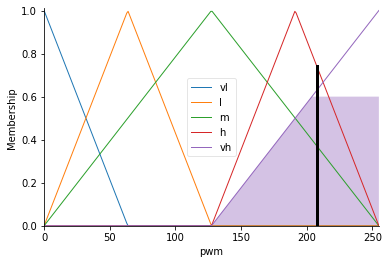

In [9]:
#Simulation
pwm_simulation = ctrl.ControlSystemSimulation(pwm_control)
pwm_simulation.input['sp'] = 16
pwm_simulation.input['sensor'] = 60
pwm_simulation.compute()
print(pwm_simulation.output['pwm'])
pwm.view(sim=pwm_simulation)

In [10]:
#Điều khiển Mobile Robot

In [11]:
#Khai báo in/out
sensor1 = ctrl.Antecedent(np.arange(5,50.1,0.1), 'sensor1')
sensor2 = ctrl.Antecedent(np.arange(5,50.1,0.1), 'sensor2')
sensor3 = ctrl.Antecedent(np.arange(5,50.1,0.1), 'sensor3')

pwm1 = ctrl.Consequent(np.arange(0,255,1),'pwm1')
pwm2 = ctrl.Consequent(np.arange(0,255,1),'pwm2')

In [13]:
#Các hàm liên thuộc
sensor1['RG'] = fuzz.trimf(sensor1.universe, [5,5,15])
sensor1['G'] = fuzz.trimf(sensor1.universe, [5,15,30])
sensor1['TB'] = fuzz.trimf(sensor1.universe, [15,30,40])
sensor1['X'] = fuzz.trimf(sensor1.universe, [30,40,50])
sensor1['RX'] = fuzz.trimf(sensor1.universe, [40,50,50])

sensor2['RG'] = fuzz.trimf(sensor1.universe, [5,5,15])
sensor2['G'] = fuzz.trimf(sensor1.universe, [5,15,30])
sensor2['TB'] = fuzz.trimf(sensor1.universe, [15,30,40])
sensor2['X'] = fuzz.trimf(sensor1.universe, [30,40,50])
sensor2['RX'] = fuzz.trimf(sensor1.universe, [40,50,50])

sensor3['RG'] = fuzz.trimf(sensor1.universe, [5,5,15])
sensor3['G'] = fuzz.trimf(sensor1.universe, [5,15,30])
sensor3['TB'] = fuzz.trimf(sensor1.universe, [15,30,40])
sensor3['X'] = fuzz.trimf(sensor1.universe, [30,40,50])
sensor3['RX'] = fuzz.trimf(sensor1.universe, [40,50,50])

pwm1['vl'] = fuzz.trimf(pwm1.universe, [0,0,255/4])
pwm1['l'] = fuzz.trimf(pwm1.universe, [0,255/4,255/2])
pwm1['m'] = fuzz.trimf(pwm1.universe, [0,255/2,255])
pwm1['h'] = fuzz.trimf(pwm1.universe, [255/2,191.25,255])
pwm1['vh'] = fuzz.trimf(pwm1.universe, [255/2,255,255])

pwm2['vl'] = fuzz.trimf(pwm2.universe, [0,0,255/4])
pwm2['l'] = fuzz.trimf(pwm2.universe, [0,255/4,255/2])
pwm2['m'] = fuzz.trimf(pwm2.universe, [0,255/2,255])
pwm2['h'] = fuzz.trimf(pwm2.universe, [255/2,191.25,255])
pwm2['vh'] = fuzz.trimf(pwm2.universe, [255/2,255,255])
